# Clustering Evaluation

In [1]:
#1. Import Library
import pandas as pd
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
#2. Generate Data
X, y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)

<module 'sklearn.datasets' from '/usr/local/lib/python3.8/dist-packages/sklearn/datasets/__init__.py'>

In [ ]:
#3. EDA
print('Nilai X : \n', X[:5])

print('\nCluster : \n', y[:5])

Nilai X : 
 [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]

Cluster : 
 [0 1 1 1 1]


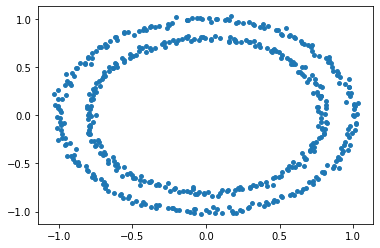

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15)
plt.show()

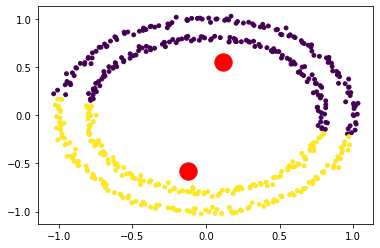

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, init='k-means++', max_iter=300,
                        n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0],
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='red')
plt.show()

DBSAN Cluster

In [ ]:
# create eps and min_samples combination
eps_values = np.arange(0.02,0.3,0.01)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values, min_samples))

In [ ]:
# list contain looping result
no_of_clusters = []
epsvalues = []
min_samp = []

# iterate over parameter combination
for p in dbscan_params:
  # craete a dbscan cluster based
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  # no of cluster must be > 1
  if len(np.unique(dbscan_cluster.labels_)) <= 1:
    break
  else:
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  # append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
# create a dataframe based on the iteration result
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,
                          columns=['no_of_clusters',
                                    'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,99,0.02,2
1,23,0.02,3
2,2,0.02,4
3,141,0.03,2
4,64,0.03,3
5,16,0.03,4
6,110,0.04,2
7,84,0.04,3
8,58,0.04,4
9,57,0.05,2


In [ ]:
eps_min_df[eps_min_df['no_of_clusters'] == 16]

,no_of_clusters,epsilon_values,minimum_points
5,16,0.03,4


In [ ]:
# Create Cluster dengan nilai eps = 0.08 dan min_samples = 2
dbscan_cluster = DBSCAN(eps=0.08, min_samples=2)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

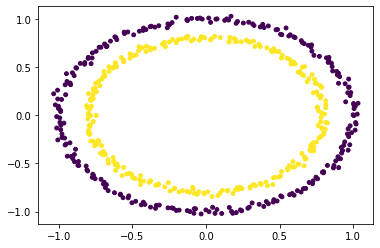

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

In [ ]:
# Cluster Evaluation
# DBI
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ', dbi_kmeans)
print('DBI DBSCAN Score : ', dbi_dbscan)

DBI KMeans Score :  1.1413660912854755
DBI DBSCAN Score :  690.8008186438688


Silhouette Score

In [ ]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score KMeans Score : ',sil_kmeans)
print('Silhouette Score DBSCAN Score : ',sil_dbscan)

Silhouette Score KMeans Score :  0.4009108760935593
Silhouette Score DBSCAN Score :  0.0183945519188842


#IMPLEMENTASI 2

In [ ]:
# Generate Data
X, y = datasets.make_blobs(n_samples=500, centers=4,
                           cluster_std=0.7, random_state=0)

In [ ]:
# EDA
print('Nilai X : \n', X[:5])

print('\nCluster : \n', y[:5])

Nilai X : 
 [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]

Cluster : 
 [1 1 0 0 1]


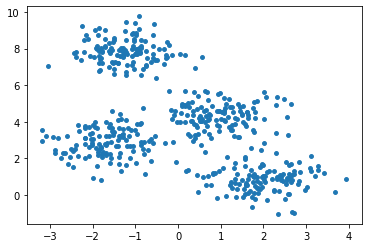

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15)
plt.show()

KMEANS Cluster

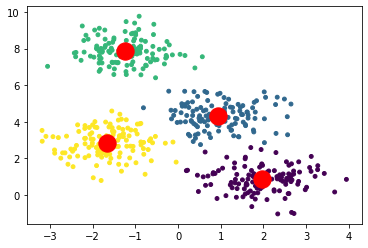

In [ ]:
kmeans_cluster = KMeans(n_clusters=4, init='k-means++', max_iter=300,
                        n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0],
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='red')
plt.show()

In [ ]:
# create eps and min_samples combination
eps_values = np.arange(0.03,0.3,0.01)
min_samples = np.arange(3)
dbscan_params = list(product(eps_values, min_samples))
eps_values

array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13,
       0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24,
       0.25, 0.26, 0.27, 0.28, 0.29])

In [ ]:
# list contain looping result
no_of_clusters = []
epsvalues = []
min_samp = []

# iterate over parameter combination
for p in dbscan_params:
  # craete a dbscan cluster based
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  # no of cluster must be > 1
  if len(np.unique(dbscan_cluster.labels_)) <= 1:
    break
  else:
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  # append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
# create a dataframe based on the iteration result
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,
                          columns=['no_of_clusters',
                                    'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,485,0.03,0
1,485,0.03,1
2,15,0.03,2
3,473,0.04,0
4,473,0.04,1
...,...,...,...
76,64,0.28,1
77,28,0.28,2
78,56,0.29,0
79,56,0.29,1


In [ ]:
eps_min_df[eps_min_df['no_of_clusters'] == 56]

,no_of_clusters,epsilon_values,minimum_points
78,56,0.29,0
79,56,0.29,1


In [ ]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=6)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

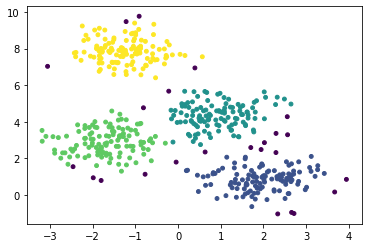

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

In [ ]:
# Cluster Evaluation
# DBI
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ', dbi_kmeans)
print('DBI DBSCAN Score : ', dbi_dbscan)

DBI KMeans Score :  0.5120623635610269
DBI DBSCAN Score :  1.949002068918896


In [ ]:
# Silhouette Score
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score KMeans Score : ',sil_kmeans)
print('Silhouette Score DBSCAN Score : ',sil_dbscan)

Silhouette Score KMeans Score :  0.6322199807775134
Silhouette Score DBSCAN Score :  0.5953553670533912
